In [1]:
import data
import torch
import encoding
import solver
from torch import nn
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import torch.nn.functional as F

In [2]:
arcData = data.ArcData('data', 'arc-agi_training')
i=10
train_inputs, train_outputs, test_inputs, test_outputs = arcData[i]

In [3]:
encoding_model = encoding.EncodingModel([128, 512], [3, 9], 1024, 0.05)
encoding_model.load_state_dict(torch.load("encoding_model.pth"))

<All keys matched successfully>

In [4]:
grid_encoding = encoding_model.encoding

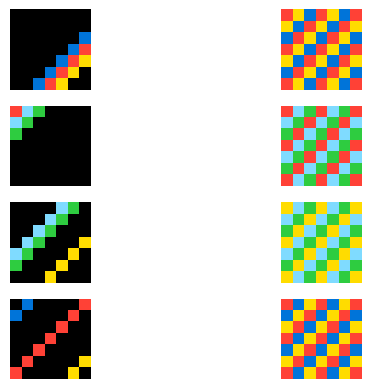

In [5]:
data.print_problem(*arcData[i], show_solution=True).show()

In [6]:
m = solver.SolvingModel(grid_encoding, 2048, 5, 0.5)

In [7]:
solver.train_mini_model(train_inputs, train_outputs, m, n_epochs=300, l2=1e-2, lr=1e-5)

loss: 0.020065, accuracy: 99.85% [300/300]

In [8]:
train_preds = m(train_inputs.to(solver.DEVICE))

In [9]:
test_preds = m(test_inputs.to(solver.DEVICE))

In [10]:
test_accuracy = (test_preds.argmax(dim=1) == test_outputs.argmax(dim=1).to(solver.DEVICE)).to(torch.float).mean().item()*100
print(f"Test accuracy: {test_accuracy:>.2f}%")

Test accuracy: 95.78%


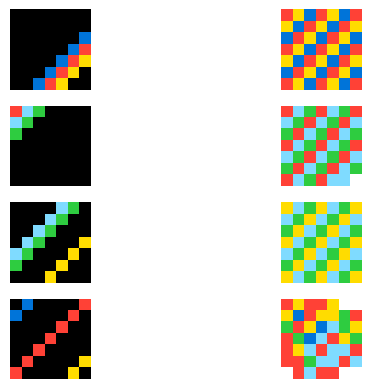

In [11]:
data.print_problem(train_inputs, train_preds, test_inputs, test_preds, show_solution=True).show()